In [2]:
import os
import PIL.Image as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def load_images_from_folder(folder_path):
  train_images = []
  train_labels = []
  test_images = []
  test_labels = []
  # at the first iteration want it to catch the train data, and then the test ones at the second
  for iteration, subfolder_1 in enumerate(os.listdir(folder_path)): # train, test
    print(f"Loading from {subfolder_1}:")
    subfolder_1_path = os.path.join(folder_path, subfolder_1)
    for label, subfolder_2 in enumerate(os.listdir(subfolder_1_path)): # ants, bees
      print(f"At iteration {iteration} - {subfolder_1}, {subfolder_2}")
      subfolder_2_path = os.path.join(subfolder_1_path, subfolder_2) 
      for file in os.listdir(subfolder_2_path):
        image_path = os.path.join(subfolder_2_path, file)
        try:
          image = Image.open(image_path).convert('RGB').resize((128, 128))
          image = np.array(image)
          if iteration == 0:
            train_images.append(image)
            train_labels.append(label)
          else:
            test_images.append(image)
            test_labels.append(label)
        except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  return (np.array(train_images), np.array(train_labels)), (np.array(test_images), np.array(test_labels))

In [4]:
# load the images data using the built function
image_path = r'C:\Users\Houcine DG\OneDrive\Bureau\Master Data Science\s3\deep learning medical - Afdel\hymenoptera_data'
(train_images, train_labels), (test_images, test_labels) = load_images_from_folder(image_path)

Loading from train:
At iteration 0 - train, ants
At iteration 0 - train, bees
Loading from val:
At iteration 1 - val, ants
At iteration 1 - val, bees


In [5]:
# print data shapes
print(f"train_images shape: {train_images.shape}, train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}, test_labels shape: {test_labels.shape}")

train_images shape: (245, 128, 128, 3), train_labels shape: (245,)
test_images shape: (153, 128, 128, 3), test_labels shape: (153,)


Text(0.5, 1.0, '0')

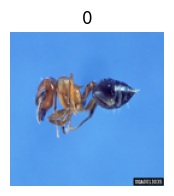

In [6]:
# show the first traing image and its label
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(train_images[0])
plt.title(train_labels[0])

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(train_labels)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [8]:
train_aug = ImageDataGenerator(
  rotation_range = 30,
  zoom_range = 0.15,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.15,
  horizontal_flip = True,
  fill_mode = "nearest"
)

val_aug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
train_aug.mean = mean
val_aug.mean = mean

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

input_shape = (128, 128, 3)
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
  loss=tensorflow.keras.losses.BinaryCrossentropy(),
  optimizer=tensorflow.keras.optimizers.Adam(),
  metrics=['accuracy'])

In [19]:
history = model.fit(train_aug.flow(train_images, train_labels_one_hot, batch_size=32), epochs=10, validation_data=val_aug.flow(test_images, test_labels_one_hot), shuffle=True)

Epoch 1/10


c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.4519 - loss: 17.2602 - val_accuracy: 0.6013 - val_loss: 2.0955
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.5879 - loss: 2.8352 - val_accuracy: 0.5556 - val_loss: 1.2622
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.5513 - loss: 1.5575 - val_accuracy: 0.6209 - val_loss: 0.8896
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5945 - loss: 0.8677 - val_accuracy: 0.5621 - val_loss: 0.7727
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5881 - loss: 0.7278 - val_accuracy: 0.5752 - val_loss: 0.7209
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.6150 - loss: 0.7028 - val_accuracy: 0.6144 - val_loss: 0.7058
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5890 - loss: 0.7080 - val_accuracy: 0.6144 - val_loss: 0.6780
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5310 - loss: 0.7576 - val_accuracy: 0.6536 - val_loss: 0.6835
Ep

Text(0.5, 1.0, 'training accuracy Vs. validation accuracy ')

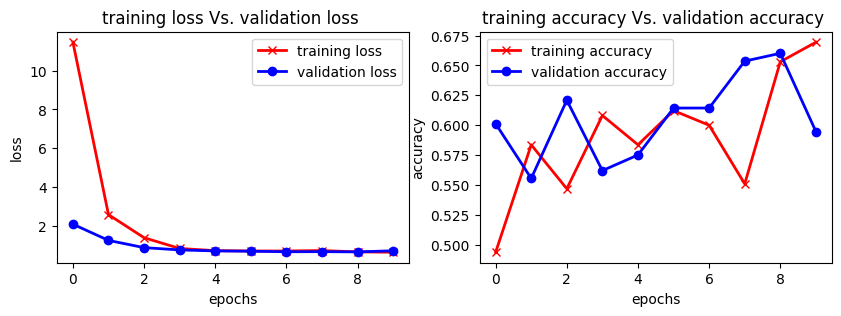

In [24]:
# training curves
# training loss Vs. validation loss 
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], marker='x', color='red', linewidth=2)
plt.plot(history.history['val_loss'], marker='o', color='blue', linewidth=2)
plt.legend(['training loss', 'validation loss'])
plt.title('training loss Vs. validation loss ')
# accuracy
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], marker='x', color='red', linewidth=2)
plt.plot(history.history['val_accuracy'], marker='o', color='blue', linewidth=2)
plt.legend(['training accuracy', 'validation accuracy'])
plt.title('training accuracy Vs. validation accuracy ')

In [21]:
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6609 - loss: 0.7262


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


(-0.5, 127.5, 127.5, -0.5)

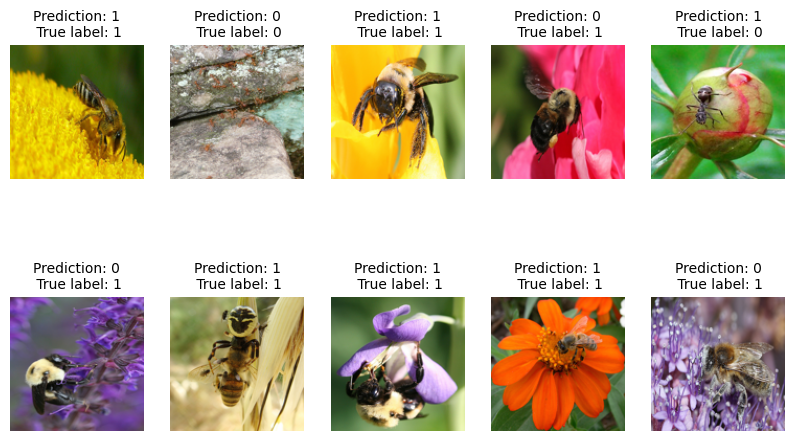

In [22]:
# let's make some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
  rand_index = np.random.randint(len(test_images))
  image_as_batch = test_images[rand_index].reshape(1, 128, 128, 3)
  prediction = np.argmax(model.predict(test_images[[rand_index]]))
  plt.subplot(2, 5, i + 1)
  plt.imshow(test_images[rand_index])
  plt.title(f"Prediction: {prediction}\n True label: {test_labels[rand_index]}", fontsize=10)
  plt.axis('off')
plt.axis('off')
# plt.tight_layout()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, predictions, target_names=['ants', 'bees']))
print(confusion_matrix(test_labels, predictions))
# it's not actually a perfect model since the data lackage!  

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

        ants       0.54      0.77      0.64        70
        bees       0.70      0.45      0.54        83

    accuracy                           0.59       153
   macro avg       0.62      0.61      0.59       153
weighted avg       0.63      0.59      0.59       153

[[54 16]
 [46 37]]
